<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [3]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical


# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [4]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2024-09-20 04:03:31--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2024-09-20 04:03:31--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.009s  

2024-09-20 04:03:31 (6.84 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2024-09-20 04:03:31--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.009s (6.84 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
df.dropna (inplace=True)
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df = pd.read_csv ("titanic.csv")
df.head ()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df2 = df.copy ()
df2= df2[["Survived", "Pclass", "Sex", "Age", "SibSp","Parch"]]
df2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,female,38.0,1,0
3,1,1,female,35.0,1,0
6,0,1,male,54.0,0,0
10,1,3,female,4.0,1,1
11,1,1,female,58.0,0,0


In [20]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

df2.dropna (inplace=True)
df2.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,female,38.0,1,0
3,1,1,female,35.0,1,0
6,0,1,male,54.0,0,0
10,1,3,female,4.0,1,1
11,1,1,female,58.0,0,0


In [22]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df2.shape

(183, 6)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [24]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,female,38.0,1,0
3,1,1,female,35.0,1,0
6,0,1,male,54.0,0,0
10,1,3,female,4.0,1,1
11,1,1,female,58.0,0,0


In [25]:



df2["Survived"].value_counts ()

,count
Survived,
1,123
0,60


<Axes: xlabel='Survived', ylabel='count'>

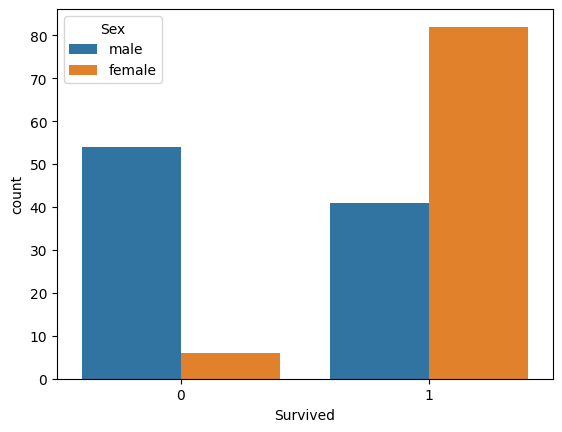

In [28]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"


sns.countplot (x="Survived", hue="Sex", data=df2)


<Axes: xlabel='Pclass', ylabel='count'>

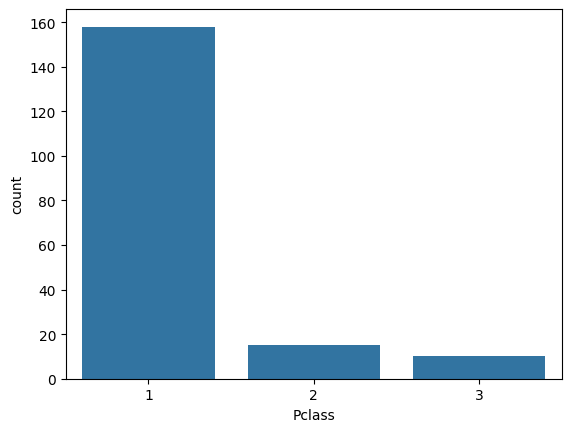

In [34]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot (x="Pclass", data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

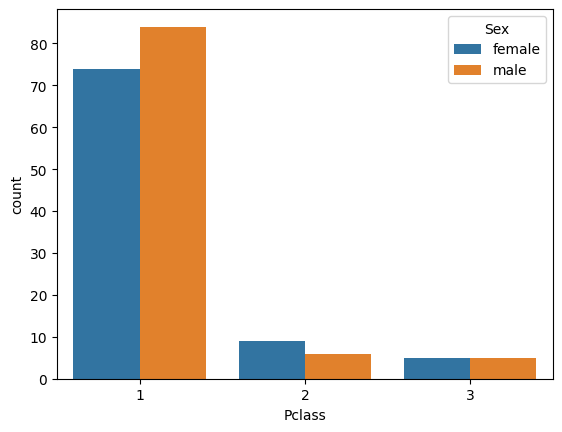

In [35]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot (x="Pclass", hue="Sex", data=df2)


#### Transformar variables categóricas texto a clases numeradas

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df3 =df2.copy()

In [38]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
Le = LabelEncoder ()
df3["Sex"] = Le.fit_transform (df3["Sex"])
df3.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,0,38.0,1,0
3,1,1,0,35.0,1,0
6,0,1,1,54.0,0,0
10,1,3,0,4.0,1,1
11,1,1,0,58.0,0,0


In [39]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

print (Le.classes_)

['female' 'male']


<ipython-input-40-06c976be81a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df3["Age"])


<Axes: xlabel='Age', ylabel='Density'>

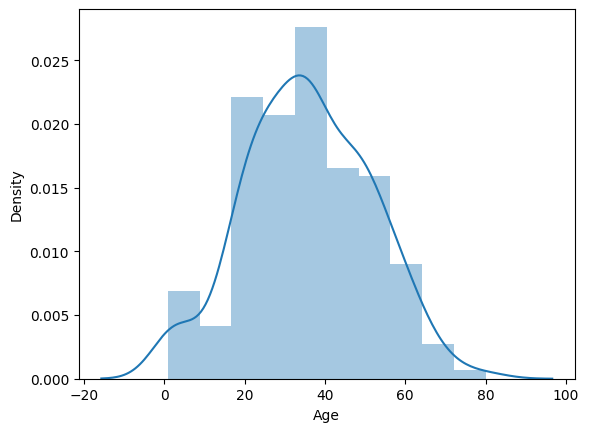

In [40]:
# Alumno: Analizar la distribución de la edad

sns.distplot (df3["Age"])

In [41]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df3.copy ()

In [42]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
df_cod["Age"] = scaler.fit_transform (df_cod[["Age"]])
df_cod.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,0,0.149065,1,0
3,1,1,0,-0.043230,1,0
6,0,1,1,1.174636,0,0
10,1,3,0,-2.030273,1,1
11,1,1,0,1.431029,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [43]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X= df_cod.drop (columns=["Survived"]).values
y= df_cod["Survived"].values

In [44]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape [1]

In [45]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 2

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [49]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

modelo = Sequential ()
modelo.add (Dense( 10, activation="relu", input_shape=(in_shape,)))
modelo.add (Dense(out_shape , activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:


modelo.compile (optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [52]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = modelo.fit (X_train, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3096 - loss: 0.9696 - val_accuracy: 0.3667 - val_loss: 0.9077
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2974 - loss: 1.0224 - val_accuracy: 0.3667 - val_loss: 0.8904
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3207 - loss: 0.9668 - val_accuracy: 0.3667 - val_loss: 0.8743
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3505 - loss: 0.9396 - val_accuracy: 0.4000 - val_loss: 0.8589
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3023 - loss: 0.9196 - val_accuracy: 0.4333 - val_loss: 0.8440
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2999 - loss: 0.9381 - val_accuracy: 0.4667 - val_loss: 0.8294
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3096 - loss: 0.8951 - val_accuracy: 0.4667 - val_loss: 0.8152
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3144 - loss: 0.9024 - val_accuracy: 0.4333 - val_loss:

<Axes: >

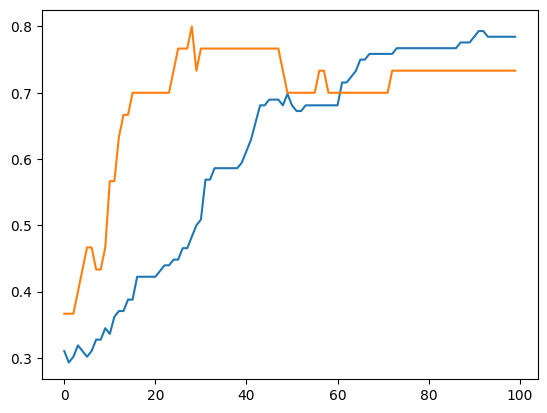

In [53]:

# plot line

sns.lineplot (x=history.epoch, y=history.history["accuracy"])
sns.lineplot (x=history.epoch, y=history.history["val_accuracy"])

In [54]:

y_hat_prob = modelo.predict (X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [56]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es

if y_hat_prob[0][0] >= 0.5:
  y_hat = 1
else:
  y_hat = 0

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [70]:

# Alumno, calcular la exactitud (accuracy) de su modelo

matrix_modelo = confusion_matrix (y_test, y_hat)
matrix_modelo

array([[ 9,  5],
       [ 3, 20]])

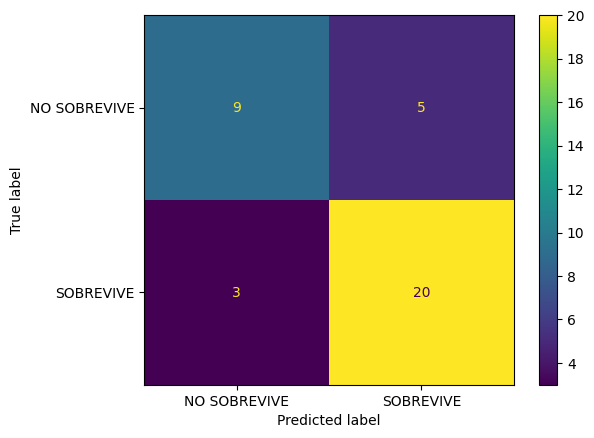

In [69]:


import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_hat = y_hat[:, 1]
matrix_confusion = confusion_matrix(y_test, y_hat)

cm_display = ConfusionMatrixDisplay(matrix_confusion, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cm_display.plot()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [71]:


Sex=0.5
Age=0.